In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1-5oavGKdvcu9lpYO9_cH4yAIT_N_ivoh'})
downloaded.GetContentFile('deeprank_aakhriII.pt')

In [ ]:
import tarfile
tar = tarfile.open("deeprank_otto_endend.pt")
tar.extractall()
tar.close()

In [ ]:
down3 = drive.CreateFile({'id':'1-5vubzGoaoSDjMl1S5JSfl4L4BJtLf16'})
down3.GetContentFile('rankdeep_again.csv') #

In [ ]:
down4 = drive.CreateFile({'id':'1Xe4lShsA4NNoq9VgpTEJ8WByrcDn9pPM'})
down4.GetContentFile('ranking_deep.tar.gz')

In [ ]:
import tarfile
tar = tarfile.open("ranking_deep.tar.gz")
tar.extractall()
tar.close()

In [ ]:
!unzip '/content/deep_ranking.zip'

Archive:  /content/deep_ranking.zip
   creating: deep_ranking/
   creating: deep_ranking/Ottoman/
  inflating: deep_ranking/Ottoman/Ottoman (1).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (10).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (100).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (101).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (102).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (103).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (104).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (105).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (106).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (107).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (108).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (11).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (12).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (13).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (14).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (15).jpg  
  inflating: deep_ranking/Ottoman/Ottoman (16)

In [ ]:
import pandas as pd
from pathlib import Path
import glob
import json
import random
import csv
import os
import re
import argparse
import numpy as np

In [ ]:
class_file = open("/content/deeprank_labels.txt", "r")
classes = [x.strip() for x in class_file.readlines()]
class_file.close()

In [ ]:
classes

['Console', 'Dining Chair', 'End Table', 'Office Chair', 'Ottoman']

In [ ]:
TRAIN_PATH = "/content/deep_ranking"
TRIPLET_PATH = "deeprank.csv"

In [ ]:
def list_pictures(directory):
  return [Path(root) / f for root, _, files in os.walk(directory) for f in files]

In [ ]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

In [ ]:
train_dir = 'cifar_10_images/'
train_sep_dir = 'train_sep_2/'
i = 0
if not os.path.exists(train_sep_dir):
  os.mkdir(train_sep_dir)
for (orig_image, class_name) in list(zip(z, z_copy)):
  if not os.path.exists(train_sep_dir + class_name):
    os.mkdir(train_sep_dir + class_name)
  src_path = train_dir + orig_image
  i = i + 1
  dst_path = train_sep_dir + class_name + '/' + orig_image
  try:
    shutil.copyfile(src_path, dst_path)
  except IOError as e:
    print('Unable to copy file {} to {}'.format(src_path, dst_path))
  #except:
    #print('When try copy file {} to {}, unexpected error: {}'.format(src_path, dst_path, sys.exc_info()))
print('done')

done


In [ ]:
def get_negative_images(all_images, image_names, num_neg_images):
  random_numbers = np.arange(len(all_images))
  np.random.shuffle(random_numbers)
  if int(num_neg_images) > (len(all_images) - 1):
    num_neg_images = len(all_images) - 1
  neg_count = 0
  negative_images = []
  for random_number in list(random_numbers):
    if all_images[random_number] not in image_names:
      negative_images.append(all_images[random_number])
      neg_count += 1
      if neg_count > (int(num_neg_images) - 1):
        break
  return negative_images

In [ ]:
def get_positive_images(image_name, image_names, num_pos_images):
  random_numbers = np.arange(len(image_names))
  np.random.shuffle(random_numbers)
  if int(num_pos_images) > (len(image_names) - 1):
    num_pos_images = len(image_names) - 1
  pos_count = 0
  positive_images = []
  for random_number in list(random_numbers):
    if image_names[random_number] != image_name:
      positive_images.append(image_names[random_number])
      pos_count += 1
      if int(pos_count) > (int(num_pos_images) - 1):
        break
  return positive_images

In [ ]:
def generate_triplets(dataset_path, num_neg_images, num_pos_images):
  triplet_df = pd.DataFrame(columns=["query", "positive", "negative"])
  all_images = []
  for class_ in classes:
    all_images += list_pictures(os.path.join(dataset_path, class_))
  for class_ in classes:
    image_names = list_pictures(os.path.join(dataset_path, class_))
    for image_name in image_names:
      query_image = image_name
      positive_images = get_positive_images(image_name, image_names, num_pos_images)
      for positive_image in positive_images:
        negative_images = get_negative_images(all_images, set(image_names), num_neg_images)
        for negative_image in negative_images:
          row = {"query": query_image, "positive": positive_image, "negative": negative_image}
          #print(row)
          triplet_df = triplet_df.append(row, ignore_index=True)
  triplet_df.to_csv(TRIPLET_PATH, index=False)
  print("Sampling done!")

In [ ]:
n_pos = 15
n_neg = 15

In [ ]:
dataset_path = TRAIN_PATH
print("Grabbing images from: " + dataset_path)
print("Number of Positive image per Query image: " + str(n_pos))
print("Number of Negative image per Query image: " + str(n_neg))
generate_triplets(dataset_path, n_neg, n_pos)

Grabbing images from: /content/deep_ranking
Number of Positive image per Query image: 15
Number of Negative image per Query image: 15
Sampling done!


In [ ]:
down = drive.CreateFile({'id':'1o_YS0MaeAyYmlZ5r8c-synYreZLn_gbg'})
down.GetContentFile('deeprank_caltech_22.pt.tar.gz')

In [ ]:
import tarfile
tar = tarfile.open("deeprank_caltech_22.pt.tar.gz")
tar.extractall()
tar.close()

In [ ]:
downloaded_4 = drive.CreateFile({'id':'1odqvwkLQ97C4Li8QF7ehLxFKxiDm2bfu'})
downloaded_4.GetContentFile('caltech_22.csv')

In [ ]:
down_2 = drive.CreateFile({'id':'1-4CLj-D8AJiqU-NHRM5yeEKWhe0Js7We'})
down_2.GetContentFile('deeprank_ottoman.pt')
#https://drive.google.com/file/d/1-4CLj-D8AJiqU-NHRM5yeEKWhe0Js7We/view?usp=sharing

In [ ]:
import argparse
import time

import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from utils import data_transforms, DatasetImageNet
from net import DeepRank

In [ ]:
BATCH_SIZE = 20
LEARNING_RATE = 0.001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
TRIPLET_PATH = "/content/rankdeep_again.csv"
MODEL_PATH = '/content/deeprank_aakhriII.pt'

In [ ]:
train_dataset = DatasetImageNet(TRIPLET_PATH, transform=data_transforms['train'])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=4)

In [ ]:
def train_model(num_epochs, optim_name=""):
  model = DeepRank()
  if torch.cuda.is_available():
    model.to(device)
  if optim_name == "adam":
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  elif optim_name == "rms":
    optimizer = optim.RMSprop(model.parameters(), lr=LEARNING_RATE)
  else:
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9, nesterov=True)
  print(f'==> Selected optimizer : {optim_name}')
  model.train()
  start_time = time.time()
  for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)
    running_loss = []
    for batch_idx, (Q, P, N) in enumerate(train_loader):
      if torch.cuda.is_available():
        Q, P, N = Q.to(device), P.to(device), N.to(device)
      optimizer.zero_grad()
      Q_embedding, P_embedding, N_embedding = model(Q), model(P), model(N)
      loss = F.triplet_margin_loss(anchor=Q_embedding, positive=P_embedding, negative=N_embedding)
      loss.backward()
      optimizer.step()
      running_loss.append(loss.item())
      print(f'\t--> epoch{epoch+1} {100 * batch_idx / len(train_loader):.2f}% done... loss : {loss:.4f}')
    epoch_loss = np.mean(running_loss)
    print(f'epoch{epoch+1} average loss: {epoch_loss:.2f}')
  finish_time = time.time()
  print(f'elapsed time : {time.strftime("%H:%M:%S", time.gmtime(finish_time - start_time))}')
  torch.save(model.state_dict(), MODEL_PATH)  # save model parameters

In [ ]:
epochs = 2
'''if int(args.epochs) < 0:
  print('This should be a positive value')
  quit()
else:
  epochs = int(args.epochs)'''
optim_type = 'sgd'
'''if str(args.optim) in ["adam", "rms"]:
  optim_type = args.optim.lower()'''
train_model(num_epochs=epochs, optim_name=optim_type)

Streaming output truncated to the last 5000 lines.
	--> epoch2 23.45% done... loss : 0.0029
	--> epoch2 23.47% done... loss : 0.0129
	--> epoch2 23.48% done... loss : 0.0086
	--> epoch2 23.50% done... loss : 0.0000
	--> epoch2 23.51% done... loss : 0.0014
	--> epoch2 23.53% done... loss : 0.0000
	--> epoch2 23.54% done... loss : 0.0000
	--> epoch2 23.56% done... loss : 0.0175
	--> epoch2 23.58% done... loss : 0.0000
	--> epoch2 23.59% done... loss : 0.0000
	--> epoch2 23.61% done... loss : 0.0156
	--> epoch2 23.62% done... loss : 0.0000
	--> epoch2 23.64% done... loss : 0.0133
	--> epoch2 23.65% done... loss : 0.0000
	--> epoch2 23.67% done... loss : 0.0145
	--> epoch2 23.68% done... loss : 0.0000
	--> epoch2 23.70% done... loss : 0.0000
	--> epoch2 23.71% done... loss : 0.0000
	--> epoch2 23.73% done... loss : 0.0045
	--> epoch2 23.74% done... loss : 0.0009
	--> epoch2 23.76% done... loss : 0.0036
	--> epoch2 23.77% done... loss : 0.0084
	--> epoch2 23.79% done... loss : 0.0017
	--> e

In [ ]:
from google.colab import files
files.download("deeprank_caltech_22_VI.pt")

In [ ]:
model = DeepRank()
model.load_state_dict(torch.load('/content/deeprank_ottoman.pt'))

RuntimeError: ignored

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import shutil
s = '/content/deeprank_aakhriII.pt'
d = '/content/gdrive/My Drive/DeepRank'
shutil.copy(s, d)

'/content/gdrive/My Drive/DeepRank/deeprank_aakhriII.pt'

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from net import DeepRank
from utils import euclidean_distance, data_transforms, DatasetImageNet

In [ ]:
TRIPLET_PATH = '/content/II_deeprank.csv'
MODEL_PATH = '/content/deeprank_otto_endend.pt'
EMBEDDING_PATH = '/content/embedding_otto.txt'

In [ ]:
class Prediction:
  def __init__(self):
    self.model = DeepRank()
    self.model.load_state_dict(torch.load(MODEL_PATH))  # load model parameters
    self.train_df = pd.read_csv(TRIPLET_PATH).drop_duplicates('query', keep='first').reset_index(drop=True)
    if not os.path.exists(EMBEDDING_PATH):
      print('pre-generated [embedding.txt] not exist!')
      self.embedding()
    self.train_embedded = np.fromfile(EMBEDDING_PATH, dtype=np.float32).reshape(-1, 4096)

  def embedding(self):
    print('  ==> Generate embedding...', end='')
    self.model.eval()  # set to eval mode
    if torch.cuda.is_available():
      self.model.to('cuda')
    train_dataset = DatasetImageNet(TRIPLET_PATH, embedding=True, transform=data_transforms['val'])
    embedded_images = []
    for idx in range(len(train_dataset)):
      input_tensor = train_dataset[idx][0]
      input_batch = input_tensor.unsqueeze(0)
      if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
      embedding = self.model(input_batch)
      embedding_np = embedding.cpu().detach().numpy()
      embedded_images.append(embedding_np)  # collect train data's predicted results
    embedded_images_train = np.concatenate(embedded_images, axis=0)
    embedded_images_train.astype('float32').tofile(EMBEDDING_PATH)  # save embedding result
    print('done! [embedding.txt] generated')

  def query_embedding(self, query_image_path):
    print(f'Query image [{query_image_path}] embedding...', end='')
    query_image = Image.open(query_image_path).convert('RGB')
    query_image = data_transforms['val'](query_image)
    query_image = query_image[None]  # add new axis. same as 'query_image[None, :, :, :]'
    self.model.eval()  # set to eval mode
    embedding = self.model(query_image)
    print('done!')
    return embedding.cpu().detach().numpy()

  def save_result(self, result, result_num, result_name):
    print('Save predicted result ...', end='')
    fig = plt.figure(figsize=(64, 64))
    columns = result_num + 1
    ax = []
    for i in range(1, columns + 1):
      dist, img_path = result[i - 1]
      img = mpimg.imread(img_path)  # read image
      ax.append(fig.add_subplot(1, columns, i))
      if i == 1:
        ax[-1].set_title("query image", fontsize=50)
      else:
        ax[-1].set_title("img_:" + str(i - 1), fontsize=50)
        ax[-1].set(xlabel='l2-dist=' + str(dist))
        ax[-1].xaxis.label.set_fontsize(25)
      plt.imshow(img, cmap='Greys_r')
    #plt.savefig(result_name)
    print('done!')

  def predict(self, query_image_path, result_num, save_as='result.png'):
    if not os.path.exists(query_image_path):
      print(f'[ERROR] invalid query image path: {query_image_path}')
      return
    query_embedded = self.query_embedding(query_image_path)
    image_dist = euclidean_distance(self.train_embedded, query_embedded)
    image_dist_indexed = zip(image_dist, range(image_dist.shape[0]))
    image_dist_sorted = sorted(image_dist_indexed, key=lambda x: x[0])
    predicted_images = [(img[0], self.train_df.loc[img[1], "query"]) for img in image_dist_sorted[:result_num]]
    pred = [(img[0], self.train_df.loc[img[1], "query"].split("/")[3]) for img in image_dist_sorted[:result_num]]
    print(pred)
    self.save_result([(0.0, query_image_path)] + predicted_images, result_num, result_name=save_as)


In [ ]:
def main():
  predictor = Prediction()
  image_path1 = '/content/langfjaell-office-chair-with-armrests__0726991_PE735482_S5.webp'
  test_images = [image_path1]
  for idx, p in enumerate(test_images):
    predictor.predict(p, 13, f'result_{idx}.png')

Query image [/content/langfjaell-office-chair-with-armrests__0726991_PE735482_S5.webp] embedding...done!
[(0.0021771938, '/content/deep_ranking/Console/Console (6).jpg'), (0.0067262948, '/content/deep_ranking/Console/Console (89).jpg'), (0.007890582, '/content/deep_ranking/Console/Console (23).jpg'), (0.008883119, '/content/deep_ranking/Office Chair/office_chair_1.jpg'), (0.010396987, '/content/deep_ranking/Office Chair/office_chair_53.jpg')]
Save predicted result ...done!


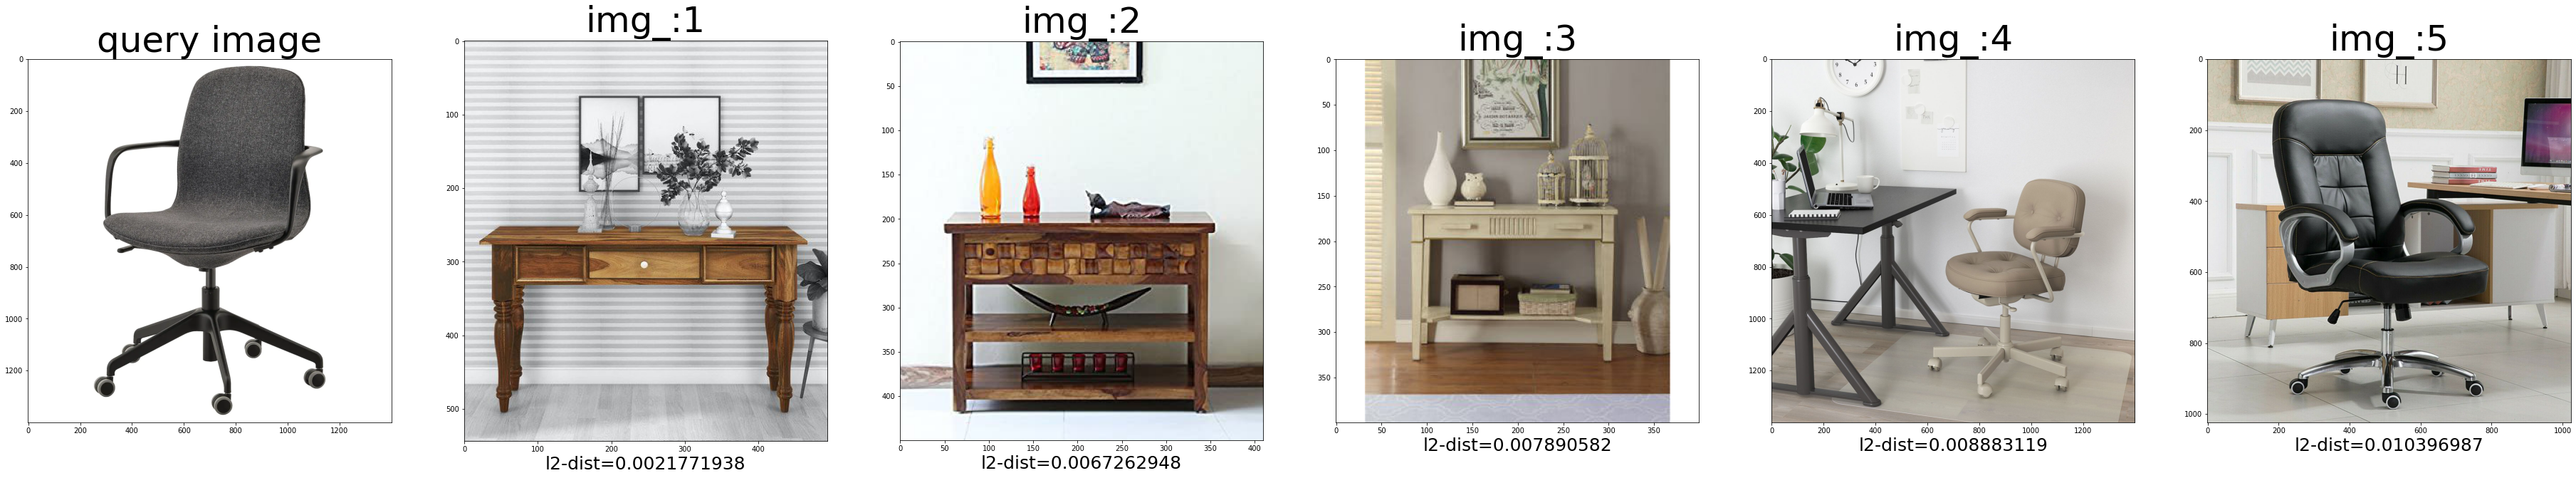

In [ ]:
main()